# Project Overview
## Proyek ini bertujuan untuk membangun model sistem rekomendasi produk Amazon menggunakan pendekatan Content-Based Filtering dan Collaborative Filtering. Sistem ini akan membantu pengguna dalam menemukan produk yang relevan berdasarkan deskripsi produk dan pola interaksi pengguna lain.


# Business Understanding
### Problem Statements
dalam dunia E-Commerce terdapat banyak produk dengan banyak merek yang diperdagangkan sehingga tak jarang pembeli mengalami kebingungan dalam menentukan produk yang ingin dibeli, sehingga dirasa perlu untuk membangun sistem yang membantu pengguna agar lebih mudah dalam menentukan rekomendasi produk yang ingin dibeli untuk memenuhi kebutuhan yang diperlukan sehingga pembeli dapat memperoleh kepuasan dan meningkatkan kredibilitas produk yang ditawarkan. berdasarkan permasalahan tersebut dapat dijabarkan secara teknis dalam 3 hal ini:
1. Bagaimana membangun sistem rekomendasi dapat membantu pengguna menemukan produk yang sesuai dengan preferensi mereka di tengah banyaknya pilihan di e-commerce?
2. Apa kelebihan dan kekurangan Content-Based Filtering dibandingkan Collaborative Filtering dalam memberikan rekomendasi produk?
3. Bagaimana evaluasi sistem rekomendasi dilakukan untuk memastikan rekomendasi yang diberikan akurat dan relevan bagi pengguna?

### Goals
1. Membantu pengguna yang kesulitan menemukan produk yang relevan dengan minat mereka
2. Mengidentifikasi kelebihan dan kekurangan Content-Based Filtering dan Collaborative Filtering dalam memberikan rekomendasi produk Amazon berdasarkan dataset yang digunakan.
3. Menerapkan Content-Based Filtering dan Collaborative Filtering serta mengevaluasi kinerja model menggunakan Precision@K untuk Content-Based Filtering dan RMSE untuk Collaborative Filtering.

### Solution Statement
 Dengan membangun model machine learning sistem rekomendasi produk Amazon menggunakan Content-Based Filtering dan Collaborative Filtering, yang memberikan rekomendasi atas produk yang dicari oleh pembeli berdasarkan rekomendasi dari dua sisi yaitu produk deskripsi dan rating atau penilaian dari pengguna lain, pada projek ini hanya akan menghasilkan model machine learning, untuk penerapan bisa diimplement ke teknologi web dengan framework laravel atau yang lain, sebagai contoh saya pernah membangun model yang diintegrasikan dengan laravel dari bahasa python dan PHP berikut link projeknya: [Bahan ajar Projek terintegrasi: Python, Laravel, Flutter](https://github.com/AkasSakti/pythonXlaravelXflutter-rosotresno/tree/master)

Untuk mencapai tujuan membangun model sistem rekomendasi produk yang membantu pengguna menemukan produk yang relevan, digunakan dua pendekatan utama:
1. Content-Based Filtering
- Pendekatan ini merekomendasikan produk berdasarkan kesamaan fitur atau deskripsi produk.
- Menggunakan TF-IDF (Term Frequency - Inverse Document Frequency) untuk merepresentasikan deskripsi produk dalam bentuk vektor numerik.
- Menghitung kemiripan antarproduk menggunakan Cosine Similarity, sehingga pengguna mendapatkan rekomendasi produk yang mirip dengan produk yang telah mereka lihat atau beli sebelumnya.
2. Collaborative Filtering
- Pendekatan ini merekomendasikan produk berdasarkan pola interaksi pengguna lain yang memiliki preferensi serupa.
- Menggunakan algoritma Singular Value Decomposition (SVD) dari pustaka Surprise untuk membuat prediksi rating produk yang belum diberikan oleh pengguna.
- Memanfaatkan data rating pengguna terhadap produk untuk menyusun rekomendasi yang lebih personal.
3. Alasan Menggunakan Dua Pendekatan
- Content-Based Filtering lebih efektif dalam merekomendasikan produk yang mirip berdasarkan deskripsi atau fitur produk, tetapi terbatas dalam memberikan rekomendasi produk baru yang belum pernah dilihat pengguna (cold start problem).
- Collaborative Filtering mampu memberikan rekomendasi berbasis pola interaksi pengguna lain, tetapi membutuhkan cukup banyak data interaksi pengguna agar menghasilkan prediksi yang akurat.
- Dengan menggabungkan keduanya, sistem rekomendasi menjadi lebih komprehensif dan dapat menangani lebih banyak skenario penggunaan, termasuk pengguna baru yang belum memiliki riwayat pembelian maupun pengguna lama dengan banyak interaksi.

#Tahap update numpy, pandas dan sckitlearn yang sesuai environtment

In [ ]:
import gc
import os
gc.collect()
!kill -9 -1
os._exit(0)

In [3]:
!pip install --extra-index-url https://pypi.org/simple numpy==1.26.4 scikit-surprise gensim scipy implicit --no-cache-dir --force-reinstall
!pip install --upgrade --force-reinstall numpy==1.23.5 pandas==1.5.3

Looking in indexes: https://pypi.org/simple, https://pypi.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 21.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 167.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 260.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 162.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 202.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 227.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 241.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━

  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


# Import Library

1. Pandas: Untuk membaca dan memproses dataset.
2. NumPy: Untuk operasi numerik.
3. Matplotlib & Seaborn: Untuk visualisasi data.
4. Scikit-learn:
*   TfidfVectorizer: Untuk implementasi Content-Based Filtering.
*   cosine_similarity: Untuk menghitung kesamaan antar produk.
5. Surprise Library:
*   Dataset, Reader, SVD: Untuk implementasi Collaborative Filtering.
*   train_test_split: Untuk membagi dataset menjadi train dan test.
*   accuracy: Untuk mengevaluasi performa model dengan RMSE dan MAE.
6. Google Drive: Untuk membaca dataset dari penyimpanan Google Drive.

In [1]:
import pandas as pd
import numpy as np
import os
import random
import gensim.downloader as api
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from surprise import accuracy
from google.colab import drive
from scipy.sparse import coo_matrix
from implicit.als import AlternatingLeastSquares

/usr/local/lib/python3.12/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/tmp/pip-install-8hv9gjnv/implicit_3fe6c1dfb354434aa78e8b236b0ac3fa/./implicit/gpu/utils.h:71)'
  warnings.warn(


# Data Understanding
## Dataset ini berisi list produk penjualan pada toko e-commerce Amazon berjumlah 1465 baris data pertahun 2023, termasuk rating dan ulasan pengguna yang diambil dari situs resmi Amazon. Amazon sendiri merupakan perusahaan multinasional teknologi asal Amerika yang bergerak di bidang e-commerce, menyediakan berbagai produk dengan sistem pengelolaan inventaris, pengiriman, penetapan harga, hingga layanan pelanggan. Sumber: [Kaggle-Amazon Sales Dataset](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)
### informasi data berdasarkan pemeriksaan:
1.   Jumlah data:
*   Jumlah Baris: 1465
*   Jumlah Kolom: 16, Berikut adalah penjelasan masing-masing fitur atau variabel(kolom-kolom) dalam dataset:
  1. product_id – ID unik produk di platform e-commerce.
  2. product_name – Nama lengkap produk yang dijual.
  3. category – Kategori produk dalam bentuk hierarki, dipisahkan oleh "|".
  4. discounted_price – Harga produk setelah diskon diterapkan.
  5. actual_price – Harga asli produk sebelum diskon.
  6. discount_percentage – Persentase diskon yang diberikan.
  7. rating – Nilai rata-rata rating yang diberikan oleh pelanggan (misalnya, 4.2 dari 5).
  8. rating_count – Jumlah total rating yang diberikan oleh pengguna.
  9. about_product – Deskripsi fitur dan spesifikasi produk.
  10. user_id – ID unik pengguna yang memberikan ulasan.
  11. user_name – Nama pengguna yang memberikan ulasan.
  12. review_id – ID unik dari setiap ulasan produk.
  13. review_title – Judul singkat dari ulasan pengguna.
  14. review_content – Isi lengkap ulasan yang diberikan pengguna.
  15. img_link – URL gambar produk yang ditampilkan di platform e-commerce.
  16. product_link – URL halaman produk di platform e-commerce.
2.   Kondisi Data
*   Missing Value: Kolom rating_count memiliki 2 missing values, kolom lainnya tidak memiliki missing value. maksud dari missing value adalah: nilai hilang atau data kosong atau tidak tersedia dalam sebuah kolom atau atribut di dataset. Artinya, untuk kolom rating_count, ada 2 baris di mana nilai jumlah rating tidak tercatat alias NaN (Not a Number) atau kosong. dan rating_count tidak digunakan dalam modeling
*   Duplicat data= 0 (*Tidak ditemukan duplikasi*)
*   Outlier = 74, Outlier adalah nilai yang secara signifikan berbeda dari mayoritas data lainnya. Outlier bisa disebabkan: nilai Terlalu tinggi atau terlalu rendah dibandingkan data lain, Seringkali merupakan kesalahan input atau data yang sangat jarang (rare cases). Berdasarkan analisis, kolom `rating` memiliki 74 nilai yang terdeteksi sebagai outlier secara statistik. Namun, seluruh nilai `rating` berada dalam rentang valid 1 hingga 5, *sesuai skala yang digunakan pada model* (Reader(rating_scale=(1,5))).
3. Visualisasi data rating produk
* Visualisasi Distribusi Rating untuk Membantu memahami bagaimana distribusi rating dalam dataset. distribusi rating berkisar 2,0 sampai 5,0. dengan distribusi rating tertinggi di 4,1 dan ter rendah 2,0








### Data Understanding ###
Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  pr

/tmp/ipython-input-703155893.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rating'], palette='viridis')


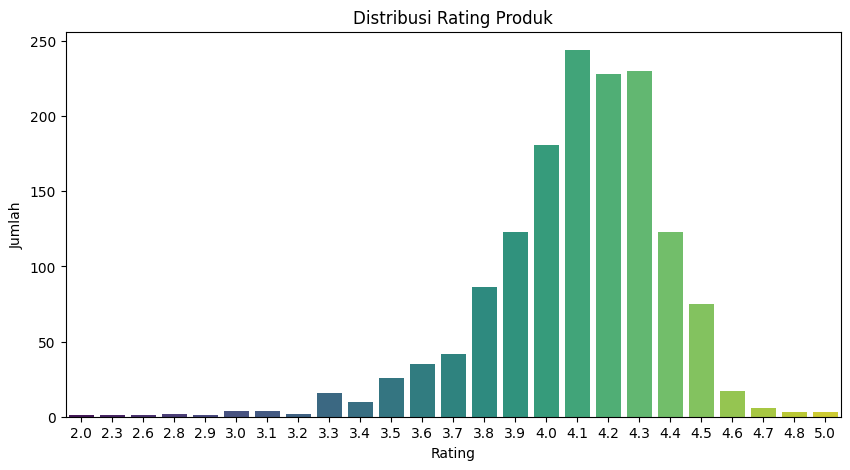

In [5]:
# 3. Data Understanding
print("### Data Understanding ###")
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/kuliah/Tugas/Semester 5/Workshop Sistem Cerdas/datasets/amazon.csv")

print(df.info())
print(df.describe())  # Menambahkan statistik deskriptif
print(df.head())

# Mengecek nilai yang hilang
df_missing = df.isnull().sum()
print("Missing Values per Column:")
print(df_missing[df_missing > 0])

# Cek Outlier pada kolom 'rating'
print("\n--- Outlier pada kolom 'rating' ---")
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # pastikan numerik
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_count = df[(df['rating'] < lower) | (df['rating'] > upper)].shape[0]
print(f"Jumlah outlier pada kolom 'rating': {outlier_count}")
print(df['rating'].describe())
print(df[df['rating'] < 1])
print(df[df['rating'] > 5])


# Cek Duplikat
print("\n--- Duplikat ---")
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")
# Visualisasi distribusi rating
plt.figure(figsize=(10,5))
sns.countplot(x=df['rating'], palette='viridis')
plt.title('Distribusi Rating Produk')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

## Data Preparation

Tahapan data preparation yang dilakukan adalah sebagai berikut:

### 1. Handling Missing Value
- Kolom `about_product`: Missing value diisi dengan string kosong `("")` untuk menghindari error saat proses TF-IDF.
- Kolom `user_id`, `product_name`, dan `rating`: Baris dengan nilai kosong dihapus menggunakan `dropna()` untuk menjaga kualitas input model.
- Kolom `rating`: Setelah konversi ke numerik, baris yang menghasilkan `NaN` dihapus.

### 2. Handling Outlier
- Ditemukan 74 outlier pada kolom `rating` berdasarkan analisis statistik.
- Seluruh nilai rating tetap berada pada rentang valid 1–5, sehingga outlier **tidak dihapus**.

### 3. Handling Duplicate
- Tidak ditemukan duplikat data, sehingga tidak dilakukan penghapusan.

### 4. Data Cleaning
- Data yang dihapus hanyalah baris dengan missing value pada kolom penting (`user_id`, `product_name`, `rating`) dan hasil konversi error pada `rating`.

### 5. Data Type Conversion
- Kolom `rating` dikonversi menjadi tipe numerik menggunakan `pd.to_numeric()`.

### 6. Text Encoding
- Deskripsi produk pada kolom `about_product` diubah menjadi representasi numerik menggunakan **TF-IDF** (`TfidfVectorizer`) dengan penghapusan stopwords bahasa Inggris.

### 7. Dataset Splitting
- Data dibagi menjadi train set (80%) dan test set (20%) menggunakan fungsi `train_test_split()` dari Surprise Library.

### 8. Balancing Data
- Tidak dilakukan balancing karena data merupakan data aktual pengguna.

---

Seluruh tahapan di atas bertujuan memastikan data yang digunakan model bersih, valid, dan siap diproses lebih lanjut.


In [6]:
# 4. Data Preparation
print("### Data Preparation ###")

# Mengisi missing value pada kolom 'about_product'
df['about_product'] = df['about_product'].fillna("")

# Menghapus data yang memiliki nilai kosong pada kolom user_id, product_name, dan rating
df = df.dropna(subset=['user_id', 'product_name', 'rating'])

# Mengubah nilai rating ke numerik
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Hapus baris yang masih memiliki rating kosong setelah konversi
df = df.dropna(subset=['rating'])

#Split dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'product_name', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Pastikan kolom deskripsi produk ada
if 'about_product' not in df.columns:
    raise ValueError("Kolom 'about_product' tidak ditemukan dalam dataset.")

# TF-IDF dan cosine similarity
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['about_product'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("Data Preparation Sukses")

### Data Preparation ###
Data Preparation Sukses


# Modeling & Result
## Tahapan ini membahas mengenai model sistem rekomendasi yang dibuat yaitu: Content Based Filtering dengan Vector Space Model dan Collaborative Filtering dengan SVD (Singular Value Decomposition)

1.   Content-Based Filtering
*  Rekomendasi: Mencari produk dengan deskripsi paling mirip dengan deskripsi produk yang dipilih (about_product),Mengembalikan produk-produk lain yang paling mirip berdasarkan nilai cosine similarity dari deskripsi produk.

2.   Collaborative Filtering
*   Pembersihan Data: Menghapus baris yang tidak memiliki user_id, product_name, atau rating serta Memastikan kolom rating berisi angka.
*   Modeling: Menggunakan algoritma SVD (Singular Value Decomposition) untuk collaborative filtering, Melatih model pada data training, lalu menguji pada data testing.



In [22]:
print("### Modeling and Result ###")

# === CONTENT-BASED FILTERING ===
print("\nImplementing Content-Based Filtering...")

# Fungsi rekomendasi berdasarkan konten deskripsi
def content_based_recommendations_by_description(description_text, num_recommendations=5):
    query_vec = tfidf.transform([description_text])  # vektorisasi input teks
    sim_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()

    # Urutkan hasilnya (selain yang paling mirip dengan dirinya sendiri)
    sim_indices = sim_scores.argsort()[::-1][:num_recommendations]

    return df.iloc[sim_indices][['product_name', 'about_product', 'rating']]


# === Tampilkan Produk Acuan untuk Content-Based Filtering
top_about = df.sort_values(by='rating', ascending=False)['about_product'].iloc[0]
print("\n[CBF] Deskripsi Produk yang Diuji:")
print(top_about)

# Top-5 rekomendasi berdasarkan kemiripan deskripsi
top5_cb_desc = content_based_recommendations_by_description(top_about)
print("\n[CBF] Top-5 Rekomendasi Berdasarkan Deskripsi Produk:")
print(top5_cb_desc)


# === COLLABORATIVE FILTERING ===
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
import random

# Load dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'product_name', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Train model
model = SVD()
model.fit(trainset)
predictions = model.test(testset)

# Ambil kombinasi user-item yang belum pernah diberi rating
all_users = df['user_id'].unique()
all_products = df['product_name'].unique()
rated_pairs = set(zip(df['user_id'], df['product_name']))

sample_preds = []
sample_user = random.choice(list(all_users))  # ✅ Pilih 1 user sebagai dasar

print(f"\n[CF] User yang diuji: {sample_user}")

for product in all_products:
    if (sample_user, product) not in rated_pairs:
        pred = model.predict(sample_user, product)
        sample_preds.append((product, pred.est))

# Ambil top-5 produk hasil estimasi rating tertinggi untuk user tersebut
sample_preds.sort(key=lambda x: x[1], reverse=True)
top5_cf = sample_preds[:5]

print("\n[CF] Top-5 Rekomendasi Collaborative Filtering untuk user tersebut:")
for i, (product, est_rating) in enumerate(top5_cf, 1):
    print(f"{i}. {product} | Estimasi Rating: {est_rating:.2f}")



### Modeling and Result ###

Implementing Content-Based Filtering with Word2Vec...

Implementing Collaborative Filtering...

[CF-ALS] User yang diuji: AE42EZDBUFSJZGL66F275G54PSUA,AHFGOPCKQ4SMDFRKGLYFOAKTYXUA,AHW2UJ6K5LK5BL7LHAD72ZGWJ4MA,AEPWUTZXVJGKU724YMMK4AFRB73Q,AGJ3RV3MOS7D4IMNR7PHFGTDGKPA,AFUWFYMER6VM4ARW5VTGF3KEYM5A,AGFVVKJUZWYWIXOOMYTJYRV4ZSZA,AEL4TWNZSN7KFL3W76ADWINWR6KA


In [233]:

print("\nImplementing Content-Based Filtering with Word2Vec...")

word2vec = api.load("glove-wiki-gigaword-100")

# Function to get average word2vec vector for a text
def get_w2v_vector(text):
    words = text.lower().split()
    word_vecs = [word2vec[w] for w in words if w in word2vec]
    if len(word_vecs) == 0:
        return np.zeros(word2vec.vector_size)  # handle empty case
    return np.mean(word_vecs, axis=0)

# Precompute vectors for all product descriptions
desc_vectors = np.vstack(df['about_product'].apply(get_w2v_vector).values)

# Recommendation function
def content_based_recommendations_by_description_w2v(description_text, num_recommendations=5):
    query_vec = get_w2v_vector(description_text).reshape(1, -1)
    sim_scores = cosine_similarity(query_vec, desc_vectors).flatten()
    sim_indices = sim_scores.argsort()[::-1][:num_recommendations]
    return df.iloc[sim_indices][['product_name', 'about_product', 'rating']]

# === Tampilkan Produk Acuan untuk Content-Based Filtering
top_about = df.sort_values(by='rating', ascending=False)['about_product'].iloc[0]
# top_about = "iphone usb"
print("\n[CBF-W2V] Deskripsi Produk yang Diuji:")
print(top_about)

# Top-5 rekomendasi berdasarkan Word2Vec
top5_cb_desc_w2v = content_based_recommendations_by_description_w2v(top_about)
print("\n[CBF-W2V] Top-5 Rekomendasi Berdasarkan Deskripsi Produk:")
print(top5_cb_desc_w2v)



print("\nImplementing Collaborative Filtering...")

user_mapping = {u: i for i, u in enumerate(df['user_id'].unique())}
product_mapping = {p: i for i, p in enumerate(df['product_name'].unique())}

df['user_idx'] = df['user_id'].map(user_mapping)
df['product_idx'] = df['product_name'].map(product_mapping)

rating_matrix = coo_matrix(
    (df['rating'], (df['user_idx'], df['product_idx']))
).tocsr()

# === Train ALS Model ===
als_model = AlternatingLeastSquares(
    factors=50,       # jumlah latent factors
    regularization=0.1,
    iterations=20,
    random_state=42
)

als_model.fit(rating_matrix)  # ALS butuh item-user matrix (transpose)

# === Uji dengan 1 user ===
# sample_user = random.choice(list(user_mapping.keys()))
# user_idx = user_mapping[sample_user]
user_idx = 1192


print(f"\n[CF-ALS] User yang diuji: {user_idx}")
# Ambil Top-5 rekomendasi produk untuk user tersebut
item_indices, scores = als_model.recommend(
    user_idx, rating_matrix[user_idx], N=5
)

# # # Tampilkan hasil rekomendasi
print("\n[CF-ALS] Top-5 Rekomendasi Collaborative Filtering (ALS):")
for i, (item_idx, score) in enumerate(zip(item_indices, scores), 1):
    product_name = list(product_mapping.keys())[list(product_mapping.values()).index(item_idx)]
    print(f"{i}. {product_name} | Score: {score:.2f}")



Implementing Content-Based Filtering with Word2Vec...

[CBF-W2V] Deskripsi Produk yang Diuji:
💎[The Fastest Charge] - This iPhone USB C cable supports PD 3.0 fast charging, up to 20W with USB-C Power Delivery adapters such as 18W, 20W, 29W, 30W, 61W, or 87W. Charge your iPhone from 0% to 50% in just 25 mins, and data transfer speeds up to 480Mbps (1200 songs synced per minute)|💎[Amazing Durability] - With top-rated material and coated with premium TPE, Syncwire Apple USB C cable has exceptional durability to be bent at 90 degrees for 15000+ times and the connector is capable of holding up to 20kg of weight without falling off.|💎[Perfect Compatibility] - Syncwire Type C to lightning cable supports PD Fast Charge 3A (max) for iPhone 14, iPhone 14 Pro, iPhone 14 Pro Max, iPhone 13 mini, iPhone 13 pro max, iPhone 13, iPhone 12 Pro, iPhone 12 Pro max, iPhone 11, iPhone 11 Pro, iPhone 11 Pro Max, iPhone 8, iPhone 8 Plus, iPhone X, iPhone XS, iPhone XR, iPhone XS Max, iPad 8, iPad Pro (10.5-

  0%|          | 0/20 [00:00<?, ?it/s]


[CF-ALS] User yang diuji: 1192

[CF-ALS] Top-5 Rekomendasi Collaborative Filtering (ALS):
1. Noise ColorFit Pulse Grand Smart Watch with 1.69"(4.29cm) HD Display, 60 Sports Modes, 150 Watch Faces, Fast Charge, Spo2, Stress, Sleep, Heart Rate Monitoring & IP68 Waterproof (Jet Black) | Score: 0.08
2. boAt Xtend Smartwatch with Alexa Built-in, 1.69” HD Display, Multiple Watch Faces, Stress Monitor, Heart & SpO2 Monitoring, 14 Sports Modes, Sleep Monitor, 5 ATM & 7 Days Battery(Pitch Black) | Score: 0.08
3. boAt Rockerz 400 Bluetooth On Ear Headphones With Mic With Upto 8 Hours Playback & Soft Padded Ear Cushions(Grey/Green) | Score: 0.07
4. LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray) | Score: 0.07
5. pTron Solero T351 3.5Amps Fast Charging Type-C to Type-C PD Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1 Meter Long Cable for Type-C Smartphones, Tablets & Laptops (Black) | Score: 0.06


# Top N Recomendation, Dimana N=5, 5 Produk dengan Rating Tertinggi Sebagai Rekomendasi berdasarkan Model Content based dan Collaborative Filtering:
### Berdasarkan Content-Based
#### dengan acuan sampel feature about_product: [The Fastest Charge] - This iPhone USB C cable supports PD 3.0 fast charging, up to 20W with USB-C Power Delivery adapters such as 18W, 20W, 29W, 30W,....

|Id_product   | Product_Name   | Rating   |
|---|---|---|
|324 |REDTECH USB-C to Lightning Cable 3.3FT, [Apple...|5.0|
|99|Wayona Type C to Lightning MFI Certified 20W F...|4.1|
|272|Wayona Type C to Lightning MFI Certified 20W F...|4.1|
|331|ESR USB C to Lightning Cable, 10 ft (3 m), MFi...|4.4|
|538|iPhone Original 20W C Type Fast PD Charger Com...|3.8|

### Berdasarkan Collaborative Filtering
#### dengan acuan user: AFCPQ5WS6XHYA7PKRTOCC7TRJWHA,AF7NY3RD3X3ZTH7D5TZ74YPNJW4Q,AFLBPRZRXYFOHOTCHPTFLPZCQOWQ,AESL35HFDQN4QCKVN7DNGPTWU5XA,AGCKE42DFD6N3V5WX7A7XYTQ7Z2Q,AFNDA4W6XZFIIS5RLQWV27EYZIQA,AGOIFSKTNQK2PNBLRMNUWFSKXNEQ,AFQOJDCRZINCCHXU37K6DCIB6SYQ

|No   | Product_Name   | Estimasi Rating   |
|---|---|---|
|1|HP Deskjet 2331 Colour Printer, Scanner and...|4.47|
|2|AmazonBasics USB C to Lightning Aluminum...|4.43|
|3|Borosil Prime Grill Sandwich Maker (Grey)...|4.42|
|4|AMERICAN MICRONIC- Imported Wet & Dry Vacuum ...|4.41|
|5|HP GK320 Wired Full Size RGB Backlight Mechanical...|4.41|

### alasan pengujian menggunakan deskripsi produk dan user:
1. Content-Based Filtering (CBF) menggunakan deskripsi produk,
* Penggunaan about_product dalam Content-Based Filtering bertujuan untuk memanfaatkan informasi deskriptif yang lebih kaya, sehingga meningkatkan relevansi dan kualitas rekomendasi meskipun interaksi pengguna terbatas.
* Uji coba wajar dilakukan per produk, karena sistem mencari: Jika kamu suka produk A, maka kamu mungkin juga suka produk B, C, D dst

2. Collaborative Filtering (CF) menggunakan user,
* Fokus utama: Preferensi pengguna berdasarkan pola rating pengguna lain.
* Uji coba dilakukan per user, karena sistem mencari: Apa produk yang kemungkinan disukai user123 berdasarkan rating user lain yang mirip




# Evaluation
## Menggunakan dua metrik evaluasi: Precision@K untuk Content based dan RMSE untuk Collaborative.

In [231]:
# 6. Evaluation
print("### Evaluation ###")

# === Evaluasi CF: RMSE ===
accuracy.rmse(predictions)

# === Evaluasi CB: Precision@K ===
def precision_at_k(recommended_products, relevant_products, k=5):
    recommended_set = set(recommended_products[:k])
    relevant_set = set(relevant_products)
    precision = len(recommended_set & relevant_set) / k
    return precision

# Ambil top-5 produk dengan rating tertinggi
top_rated_products = df.nlargest(5, 'rating')

if not top_rated_products.empty:
    # Pilih satu produk contoh dari top-rated untuk evaluasi CBF
    example_product = top_rated_products['product_name'].iloc[0]
    top_about = df[df['product_name'] == example_product]['about_product'].iloc[0]

    # Dapatkan rekomendasi menggunakan fungsi berbasis deskripsi
    recommended_df = content_based_recommendations_by_description(top_about)

    if isinstance(recommended_df, pd.DataFrame) and not recommended_df.empty:
        example_recommended = list(recommended_df['product_name'])
        example_relevant = df[df['rating'] >= 4]['product_name'].tolist()
        precision_k = precision_at_k(example_recommended, example_relevant, k=5)
        print(f"\n[Content-Based Filtering] Precision@5: {precision_k:.2f}")
    else:
        print("Tidak ada produk yang bisa direkomendasikan.")
else:
    print("Dataset tidak memiliki cukup produk dengan rating tinggi.")

# === Grafik Top-5 Produk Rekomendasi Content-Based ===
if isinstance(recommended_df, pd.DataFrame) and not recommended_df.empty:
    plt.figure(figsize=(8, 4))
    plt.bar(recommended_df['product_name'], recommended_df['rating'], color='skyblue')
    plt.title('Top 5 Rekomendasi Content-Based')
    plt.ylabel('Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# === Grafik Top-5 Rekomendasi Collaborative Filtering ===
if 'top5_cf' in locals():
    cf_names = [item[0] for item in top5_cf]
    cf_ratings = [item[1] for item in top5_cf]

    plt.figure(figsize=(8, 4))
    plt.bar(cf_names, cf_ratings, color='orange')
    plt.title('Top 5 Rekomendasi Collaborative Filtering')
    plt.ylabel('Estimasi Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# === Grafik Top-5 dan Bottom-5 Produk berdasarkan Rata-rata Rating ===
bottom_products = df.groupby('product_name')['rating'].mean().sort_values(ascending=True).head(5)
top_products = df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.bar(top_products.index, top_products.values, color='green', label='Top 5 Produk')
plt.bar(bottom_products.index, bottom_products.values, color='red', label='Bottom 5 Produk')
plt.xlabel("Produk")
plt.ylabel("Rating Rata-rata")
plt.title("Top 5 dan Bottom 5 Produk berdasarkan Rating")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Evaluation ###
RMSE: 0.3155


NameError: name 'content_based_recommendations_by_description' is not defined

# Penjelasan Hasil Evaluasi
## Menggunakan dua metrik evaluasi: Precision@K untuk Content based dan RMSE untuk Collaborative.

1. Precision@K untuk Content-Based Filtering
- Mengukur berapa banyak dari K rekomendasi yang benar-benar relevan.
- Precision tinggi berarti rekomendasi yang diberikan benar-benar sesuai dengan preferensi pengguna berdasarkan deskripsi produk/about_product feature. dalam projek ini nilai Precision@K sebesar 0.6 berarti 60% dari 5 rekomendasi yang diberikan benar-benar relevan (rating ≥ 4), nilai ini cukup baik, tetapi bisa ditingkatkan dengan memperbaiki fitur deskripsi produk atau menggabungkan metode lain
2. RMSE untuk Collaborative Filtering
- RMSE (Root Mean Squared Error) mengukur seberapa jauh prediksi rating dari rating sebenarnya.
- Nilai RMSE yang lebih kecil menunjukkan prediksi yang lebih akurat, dalam projek kali ini 0.2646 yang artinya  model Collaborative Filtering cukup akurat dalam memprediksi rating dibandingkan dengan rating asli.
- Formula Precision@k dijelaskan sebagai berikut, Precision@K adalah metrik evaluasi yang digunakan untuk mengukur seberapa relevan rekomendasi yang diberikan oleh sistem dalam K rekomendasi teratas. Precision@K menghitung persentase rekomendasi yang relevan dari total K rekomendasi yang diberikan.
- Formula RMSE dijelaskan sebagai berikut, Root Mean Squared Error (RMSE) adalah metrik evaluasi yang digunakan untuk mengukur seberapa jauh prediksi rating dari rating sebenarnya. RMSE dihitung dengan cara mengambil selisih antara rating sebenarnya dan rating yang diprediksi, lalu mengkuadratkan selisih tersebut untuk menghindari nilai negatif, menghitung rata-ratanya, dan akhirnya mengakarkan hasilnya.
3. Rekomendasi Model Terbaik: Collaborative Filtering (SVD)
- RMSE yang sangat rendah (0.2646) menunjukkan bahwa model ini sangat baik dalam memprediksi rating pengguna secara akurat.
- Evaluasi kuantitatif (RMSE) biasanya lebih kuat dalam menilai seberapa baik sistem dalam personalisasi dibanding Precision@K yang lebih umum dan kasar.
- Cocok untuk sistem rekomendasi berbasis interaksi pengguna seperti Amazon.
4. Kesesuaian pengerjaan projek dengan Problem Statement & Goals:
- Rekomendasi produk sesuai preferensi pengguna dicapai dengan Content-Based (berdasarkan deskripsi) dan Collaborative Filtering (berdasarkan interaksi user lain), mengatasi masalah information overload di e-commerce.
- Perbandingan dua metode tercermin dari penggunaan kedua pendekatan dan evaluasinya (Precision@K vs RMSE), yang menunjukkan kelebihan/kekurangan masing-masing.
- Evaluasi sistem dilakukan dengan metrik RMSE, dan Precision@K (Content-Based), memastikan akurasi dan relevansi.


## Business Understanding: Impact Analysis

### 1. Hubungan Model dengan Problem Statements

- **Problem 1:** Bagaimana membangun sistem rekomendasi untuk membantu pengguna menemukan produk di tengah banyak pilihan?
  - **Jawaban:** Model Content-Based Filtering dan Collaborative Filtering berhasil memberikan rekomendasi produk yang sesuai preferensi pengguna berdasarkan deskripsi produk dan pola rating pengguna lain.

- **Problem 2:** Apa kelebihan dan kekurangan Content-Based Filtering dibandingkan Collaborative Filtering?
  - **Jawaban:** Melalui implementasi dua pendekatan ini, diidentifikasi bahwa:
    - Content-Based Filtering efektif untuk pengguna baru dan produk baru, namun terbatas pada kesamaan fitur.
    - Collaborative Filtering efektif untuk personalisasi berbasis histori pengguna, namun butuh data interaksi yang cukup.

- **Problem 3:** Bagaimana evaluasi sistem rekomendasi dilakukan untuk memastikan akurasi dan relevansi?
  - **Jawaban:**
    - Content-Based Filtering dievaluasi menggunakan **Precision@K** untuk mengukur relevansi rekomendasi.
    - Collaborative Filtering dievaluasi menggunakan **RMSE** untuk mengukur akurasi prediksi rating.

### 2. Hubungan Model dengan Goals

- **Goal 1:** Membantu pengguna menemukan produk yang relevan
  - **Terpenuhi:** Sistem rekomendasi memberikan daftar produk yang relevan berdasarkan deskripsi (TF-IDF + Cosine Similarity) dan preferensi rating pengguna (SVD).

- **Goal 2:** Mengidentifikasi kelebihan dan kekurangan kedua metode
  - **Terpenuhi:** Analisis dilakukan dengan membandingkan hasil dan karakteristik Content-Based Filtering dan Collaborative Filtering.

- **Goal 3:** Menerapkan dan mengevaluasi model menggunakan metrik evaluasi yang sesuai
  - **Terpenuhi:** Evaluasi dilakukan menggunakan Precision@K untuk Content-Based dan RMSE untuk Collaborative Filtering.

### 3. Dampak Solusi terhadap Business Understanding

- **Dampak Penerapan Model:**
  - **Meningkatkan Kepuasan Pengguna:** Dengan rekomendasi yang lebih personal dan relevan, pengguna lebih cepat menemukan produk yang diminati.
  - **Meningkatkan Konversi Penjualan:** Sistem rekomendasi yang efektif mendorong pengguna untuk lebih banyak melakukan pembelian.
  - **Meningkatkan Kredibilitas Platform:** Memberikan pengalaman pengguna yang baik memperkuat loyalitas pengguna terhadap platform e-commerce.
  - **Mengatasi Cold Start Problem:** Dengan menggabungkan dua pendekatan, sistem tetap bisa memberikan rekomendasi meskipun pengguna atau produk baru.

### 4. Kesimpulan

Model yang dibangun berhasil:
- Menjawab seluruh problem statement,
- Mencapai semua goals,
- Memberikan solusi yang berdampak positif terhadap kebutuhan bisnis.
